In [64]:
import numpy as np 
import pandas as pd

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data preprocesing

## Importing the dataset

In [2]:
rawData = pd.read_csv("./Churn_Modelling.csv")

In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
rawData.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:>

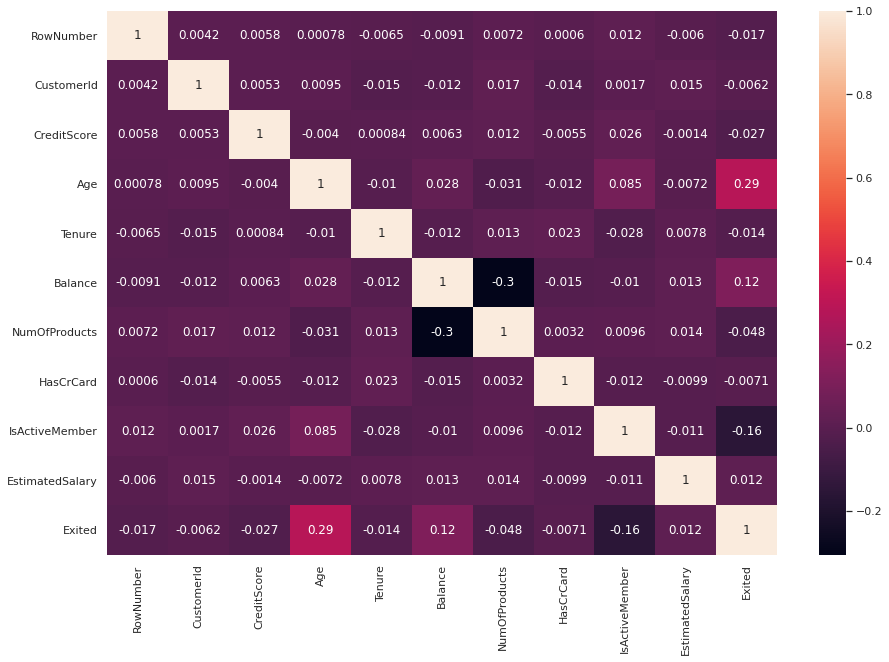

In [5]:
# Checking for the correlation between the columns
plt.figure(figsize=(15, 10))
sns.heatmap(rawData.corr(), annot = True)

In [6]:
preprocessing = rawData.copy()

In [7]:
# Dropping useless columns
preprocessing = preprocessing.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

## Data analysis

In [9]:
preprocessing.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Average Credit Score by country [Germany, France, Spain]

In [18]:
# Seperate datasets for each country
germany = preprocessing[preprocessing["Geography"] == "Germany"]
france = preprocessing[preprocessing["Geography"] == "France"]
spain = preprocessing[preprocessing["Geography"] == "Spain"]

In [19]:
# Average credit score by country
germanyCreditScore = germany.CreditScore.sum() / germany.count()[0]
franceCreditScore = france.CreditScore.sum() / france.count()[0]
spainCreditScore = spain.CreditScore.sum() / spain.count()[0]

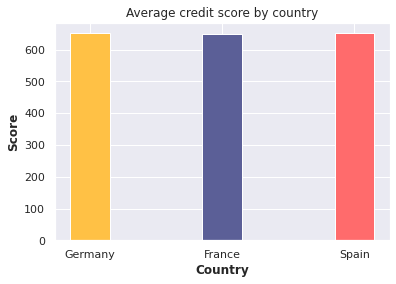

Germany: 651.45 | France: 649.67 | Spain: 651.33


In [32]:
plt.bar(x = ["Germany", "France", "Spain"], 
        height = [germanyCreditScore, franceCreditScore, spainCreditScore],
        width = .3, color = ["#FFC145", "#5B5F97", "#FF6B6C"])

plt.title("Average credit score by country")
plt.xlabel("Country", fontweight = "bold", fontsize = 12)
plt.ylabel("Score", fontweight = "bold", fontsize = 12)
plt.show()
print(f"Germany: {round(germanyCreditScore, 2)} | France: {round(franceCreditScore, 2)} | Spain: {round(spainCreditScore, 2)}")

In [35]:
germanyBalance = germany.Balance.sum()
franceBalance = france.Balance.sum()
spainBalance = spain.Balance.sum()

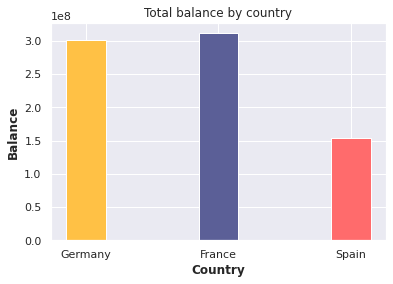

Germany: 300402861.38 | France: 311332479.49 | Spain: 153123552.01


In [36]:
plt.bar(x = ["Germany", "France", "Spain"], 
        height = [germanyBalance, franceBalance, spainBalance],
        width = .3, color = ["#FFC145", "#5B5F97", "#FF6B6C"])

plt.title("Total balance by country")
plt.xlabel("Country", fontweight = "bold", fontsize = 12)
plt.ylabel("Balance", fontweight = "bold", fontsize = 12)
plt.show()
print(f"Germany: {round(germanyBalance, 2)} | France: {round(franceBalance, 2)} | Spain: {round(spainBalance, 2)}")

In [39]:
germanyAge = germany.Age.sum() / germany.count()[0]
franceAge = france.Age.sum() / france.count()[0]
spainAge = spain.Age.sum() / spain.count()[0]

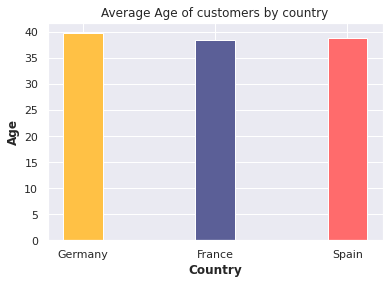

Germany: 40 | France: 39 | Spain: 39


In [40]:
plt.bar(x = ["Germany", "France", "Spain"], 
        height = [germanyAge, franceAge, spainAge],
        width = .3, color = ["#FFC145", "#5B5F97", "#FF6B6C"])

plt.title("Average Age of customers by country")
plt.xlabel("Country", fontweight = "bold", fontsize = 12)
plt.ylabel("Age", fontweight = "bold", fontsize = 12)
plt.show()
print(f"Germany: {round(germanyAge)} | France: {round(franceAge)} | Spain: {round(spainAge)}")

## Data preparation
Preparing the dataset for the ML algorithm

In [42]:
data = preprocessing.copy()

In [43]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [44]:
x = data.iloc[:, : -1].values
y = data.iloc[:, -1].values

## Encoding the Categorical values

In [52]:
x

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [56]:
labelEnc = LabelEncoder()
oneHot = OneHotEncoder()

In [57]:
x[:, 2] = labelEnc.fit_transform(x[:, 2])
print(x)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [59]:
cTransformer = ColumnTransformer(
    transformers = [('encoder', OneHotEncoder(), [1])],
    remainder = 'passthrough'
)

In [60]:
x = np.array(cTransformer.fit_transform(x))

In [61]:
x

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [63]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = .2, random_state = 0)

In [ ]:
scaler = StandardScaler()
xTrain[:, 3:] = scaler.fit_transform(xTrain[:, 3:])
xTest[:, 3:] = scaler.fit_transform(xTrain[:, 3:])
